# Цена дома в Нью Йорке

In [121]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme('notebook')
sns.set_palette('Set2')
from sklearn.preprocessing import OneHotEncoder

## Первичный анализ и обработка


In [122]:
# знакомство с данными, предворительынй анализ
df = pd.read_csv('data/AB_NYC_2019.csv')
display(df.head())
df.info()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [123]:
# проверим данные на наличие пропусков
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [124]:
display(df['name'].value_counts().count())

47905

In [125]:
display(df['host_name'].value_counts().count())
df['host_name'].value_counts()

11452

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [126]:
# первые два признака с отсутствующими значениями
# малоинформативны в рамках нашей задачи, опустим их
# проверим признаки last_review  и reviews_per_month

mask = df['last_review'] == None
df[mask]['reviews_per_month'].count()

0

In [127]:
# мы убедились, что пропуски в столбцах парные,
# проверим общее число обзоров, в зависимости от столбцов

mask = df['number_of_reviews'] == 0
df[mask].isnull().sum()/df[mask].shape[0] * 100

id                                  0.000000
name                                0.099483
host_id                             0.000000
host_name                           0.049741
neighbourhood_group                 0.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                       100.000000
reviews_per_month                 100.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
dtype: float64

In [128]:
# избавимся от пропусков
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = df['last_review'].fillna('Never')

In [129]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

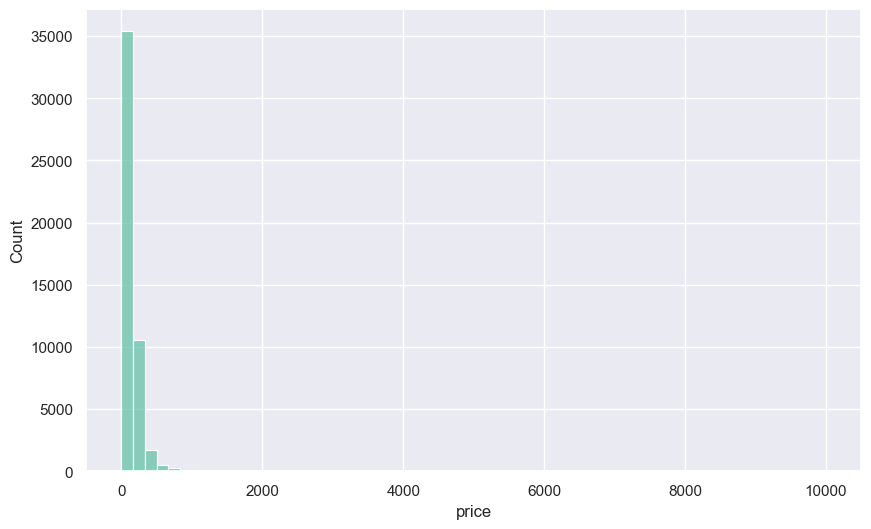

In [130]:
# посмотрим на распределение целевого признака
fig, axis = plt.subplots(figsize=(10,6))
sns.histplot(df['price'], bins = 60)
plt.show();

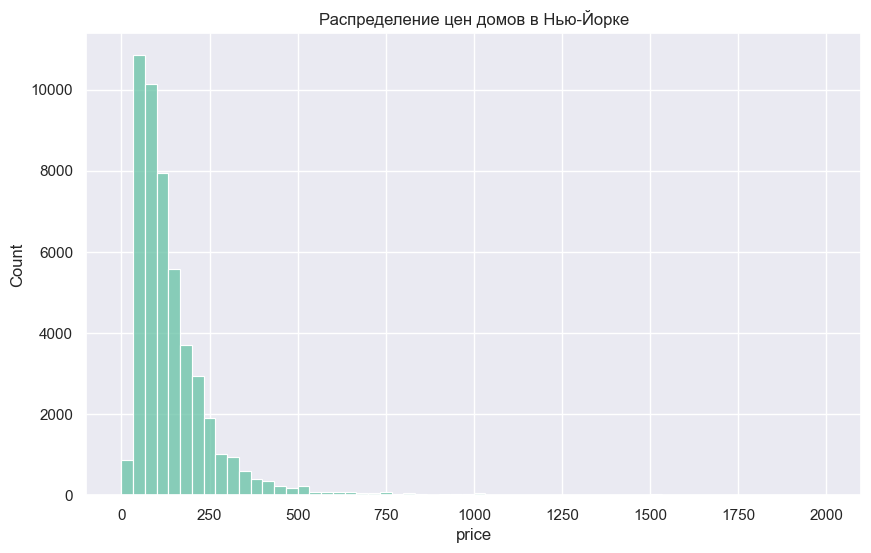

In [131]:
mask = df['price'] < 2000

fig, axis = plt.subplots(figsize=(10,6))
sns.histplot(df[mask]['price'], bins=60)
plt.title('Распределение цен домов в Нью-Йорке')
plt.show();

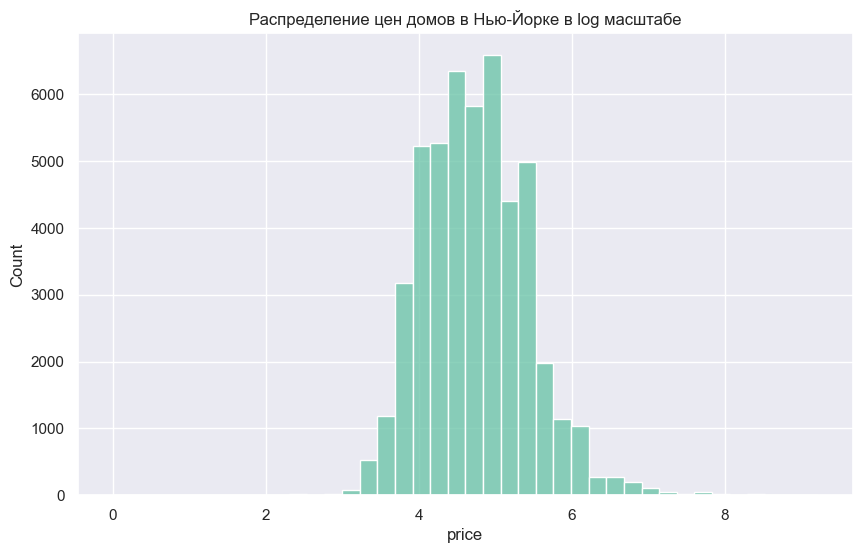

In [132]:
log_prise = np.log1p(df['price'])

fig, axis = plt.subplots(figsize=(10,6))
sns.histplot(log_prise, bins=40)
plt.title('Распределение цен домов в Нью-Йорке в log масштабе')
plt.show();

In [133]:
# отберем признаки для дальнейшей работы
columns = ['neighbourhood_group', 'latitude',
           'longitude', 'room_type', 'minimum_nights',
           'number_of_reviews', 'last_review', 'reviews_per_month',
           'calculated_host_listings_count', 'availability_365', 'price']
data = df[columns]

## Преобразование, селекция и кодирование признаков 

In [134]:
data['log_price'] = log_prise

C:\Users\grida\AppData\Local\Temp\ipykernel_20060\2256520765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = log_prise


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   last_review                     48895 non-null  object 
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  price                           48895 non-null  int64  
 11  log_price                       48895 non-null  float64
dtypes: float64(4), int64(5), object(

In [136]:
# neighbourhood_group

data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

C:\Users\grida\AppData\Local\Temp\ipykernel_20060\1128355235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['mean_price'] = data.groupby('neighbourhood_group')['price'].transform('mean')


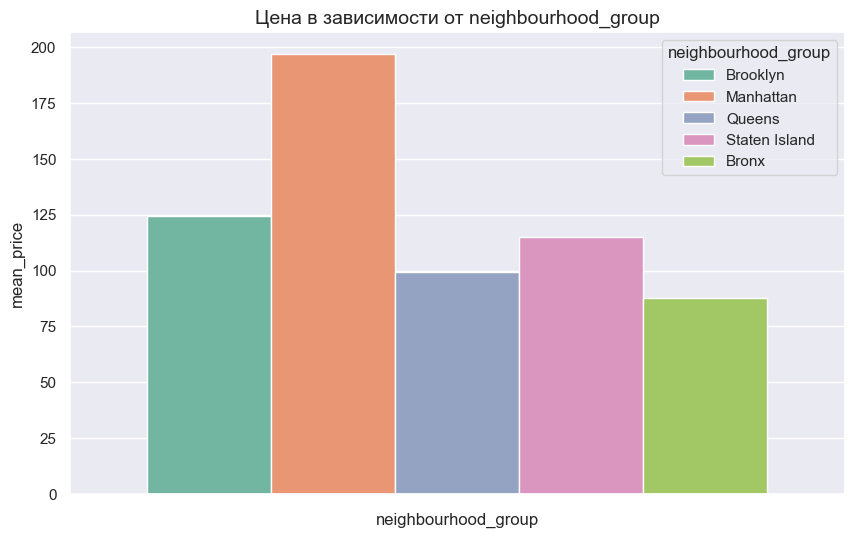

In [137]:
group_data = data
group_data['mean_price'] = data.groupby('neighbourhood_group')['price'].transform('mean')

fig, axis = plt.subplots(figsize=(10,6))

axis = sns.barplot(group_data, y='mean_price', hue='neighbourhood_group')
axis.set_title('Цена в зависимости от neighbourhood_group', fontsize=14)
axis.set_xlabel('neighbourhood_group')
axis.set_ylabel('mean_price')

plt.show();

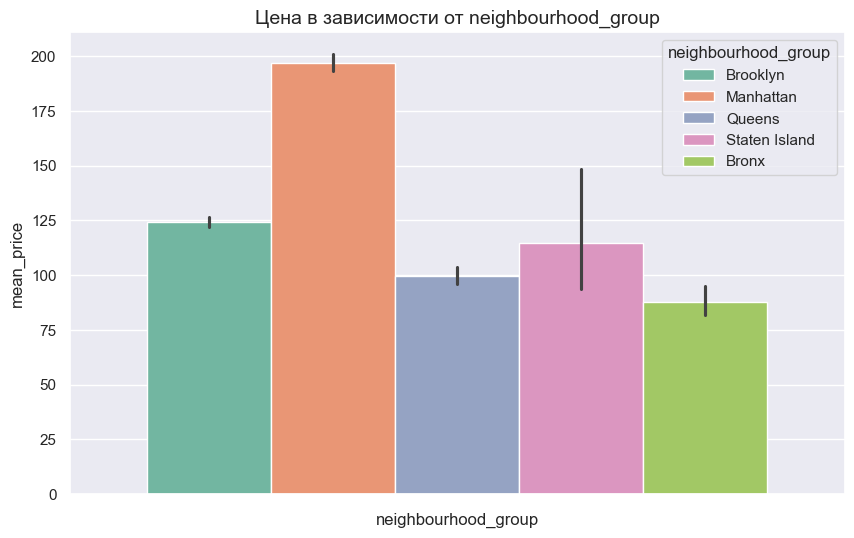

In [138]:
fig, axis = plt.subplots(figsize=(10,6))

axis = sns.barplot(data, y='price', hue='neighbourhood_group')
axis.set_title('Цена в зависимости от neighbourhood_group', fontsize=14)
axis.set_xlabel('neighbourhood_group')
axis.set_ylabel('mean_price')

plt.show();

In [139]:
# так как в neighbourhood_group мало различных значений
# закодируем признак one_hot кодированием

ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(data[['neighbourhood_group']])
data = pd.concat([data, ohetransform], axis=1).drop(columns=['neighbourhood_group'])

In [140]:
# room_type

data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

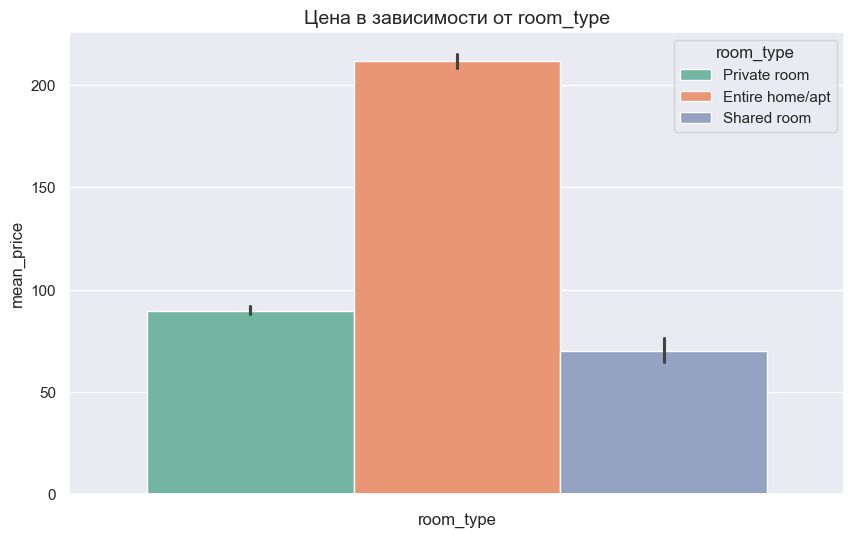

In [141]:
fig, axis = plt.subplots(figsize=(10,6))

axis = sns.barplot(data, y='price', hue='room_type')
axis.set_title('Цена в зависимости от room_type', fontsize=14)
axis.set_xlabel('room_type')
axis.set_ylabel('mean_price')

plt.show();

In [142]:
# так как в room_type мало различных значений
# мы так же закодируем его one_hot кодированием

ohetransform = ohe.fit_transform(data[['room_type']])
data = pd.concat([data, ohetransform], axis=1).drop(columns=['room_type'])

In [143]:
# last_review
data['last_review_year'] = data['last_review'].apply(lambda x: int(x.split('-')[0]) if '-' in x else 0)
data['last_review_month'] = data['last_review'].apply(lambda x: int(x.split('-')[1]) if '-' in x else 0)

In [148]:
data['last_review_year'].value_counts()

2019    25209
0       10052
2018     6050
2017     3205
2016     2707
2015     1393
2014      199
2013       48
2012       25
2011        7
Name: last_review_year, dtype: int64

In [147]:
data['last_review_month'].value_counts()

6     13589
0     10052
7      5937
5      4701
1      2773
4      2109
12     1770
8      1667
10     1546
9      1535
3      1288
11     1158
2       770
Name: last_review_month, dtype: int64

In [ ]:
data['last_review_year'] = data['last_review'].apply(lambda x: int(x.split('-')[0]) if '-' in x else 0)
data['last_review_month'] = data['last_review'].apply(lambda x: int(x.split('-')[1]) if '-' in x else 0)
data = data.drop(columns='last_review')

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           48895 non-null  float64
 1   longitude                          48895 non-null  float64
 2   minimum_nights                     48895 non-null  int64  
 3   number_of_reviews                  48895 non-null  int64  
 4   reviews_per_month                  48895 non-null  float64
 5   calculated_host_listings_count     48895 non-null  int64  
 6   availability_365                   48895 non-null  int64  
 7   price                              48895 non-null  int64  
 8   neighbourhood_group_Bronx          48895 non-null  float64
 9   neighbourhood_group_Brooklyn       48895 non-null  float64
 10  neighbourhood_group_Manhattan      48895 non-null  float64
 11  neighbourhood_group_Queens         48895 non-null  flo

## Проверка на мультиколлениарность, заключительная обработка

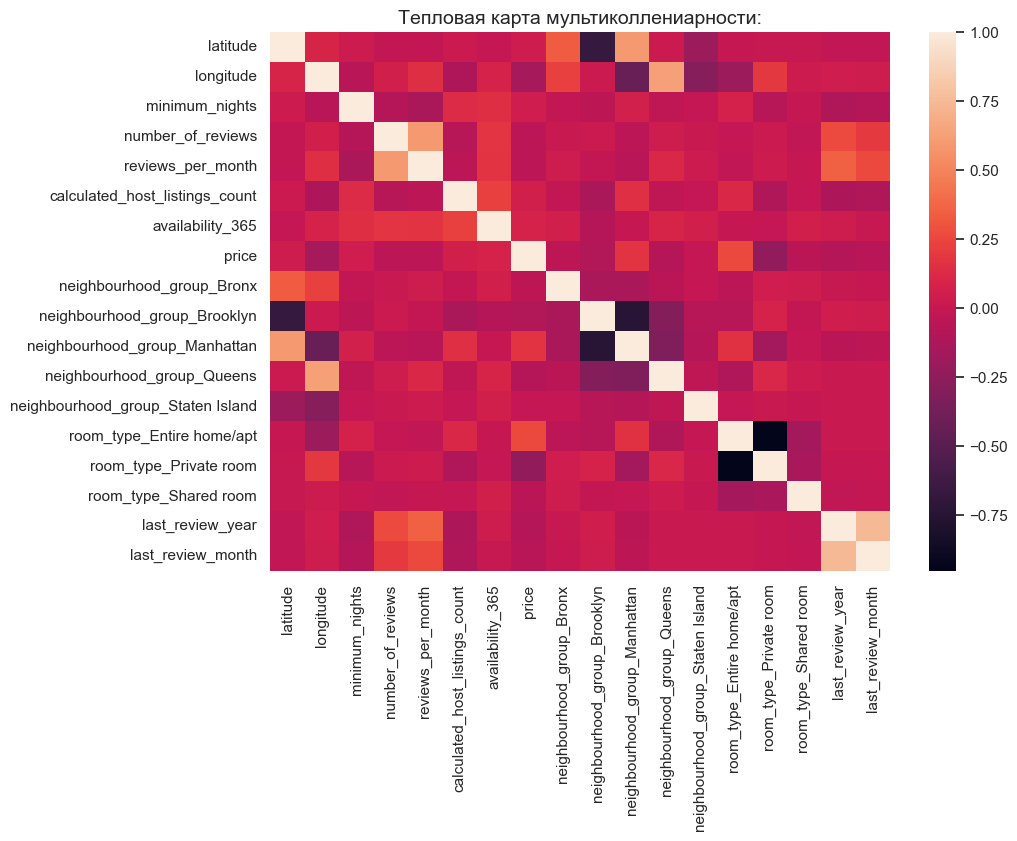

In [105]:
fig, axis = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr())
plt.title('Tепловая карта мультиколлениарности:', fontsize=14)
plt.show();

## Построение модели